<a href="https://colab.research.google.com/github/keshavmot/Case-Study-Notebooks/blob/main/CaseStudy_Aerofit_KeshavMot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keshav Mot | Business Case: Aerofit - Descriptive Statistics & Probability

#Problem Statement

The market research team endeavored to conduct descriptive analytics with the objective of developing comprehensive customer profiles for each treadmill product. The primary focus was on exploring potential variations in customer characteristics, including age, gender, education, marital status, usage patterns, income, self-rated fitness, and anticipated weekly miles. This dataset, recored over three months from people purchasing these treadmills. Through creating two-way contingency tables and computing all conditional and marginal probabilities along with their insights/impact on the business.

# Dataset Observations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit.csv

In [ ]:
aerofit_df = pd.read_csv('aerofit.csv')
df_2 = aerofit_df.copy(deep=True)

aerofit_df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
#Shape of data frame
aerofit_df.shape

(180, 9)

DataSet have 180 entry that inculde all 3 type of Treadmill models

In [ ]:
#Checking information column wise
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


We have 9 columns from which:
* 6 columns have a numerical value
  *  Age, Education, Usage, Fitness, Income, Miles(Avg. per week)
* 3 rest are object type.
  *  Genders is "Male" or "Females"
  *  MaritalStatus is "Single" or "partnered"
  *  Products shows different model of treadmills


* There is **No Null** values in the data

In [ ]:
aerofit_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Checking description of numerical columns:
 * AGE : ranges from 18 to 50 years only
 * EDUCATION : mean education between customers is 15.5 years and it does not vary largely among the users
 * USAGE : this is number of times person use it in a week and this can be a maximum of 7 days
 * FITNESS : fitness level ranges from 1 (poor) to 5 (Fit)
 * INCOME : in USD largely vary among the users
 * MILES : describe the usage of treadmill per week




In [ ]:
aerofit_df.describe(include = 'object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


Checking description of other columns:
 *  Maximum customers are in a partnership

 *  Males are top treadmill buyers

 *  There are 3 unique models (From problem statement):
   *   KP281 | Entry - level runners  | $1,500. -----> (Best Selling Product)

   *   KP481 | Mid - level treadmill  | $1,750.

   *   KP781 | With advanced features | $2,500.


---
# Pre-processing

As in the problem statement we have a additional information of price of the treadmill according to the model number, we can take that into account.

In [ ]:
#Adding new Column of price as per the model.

price_dict = {'KP281':1500, 'KP481':1750, 'KP781':2500 }
aerofit_df["Price"] = aerofit_df["Product"].map(price_dict)

In [ ]:
aerofit_df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500


---
# Non-Graphical Analysis
*NOTE: Question & analysis both are above the respective code*

**Q: What are different models sold by the aerofit and ratio of there sales?**
* There are three different models available and thier sales percentages are as follows:
 *  KP281    44.4%
 *  KP481    33.3%
 *  KP781    22.2%
* Their base varient is the highest selling model and sells two times the Advance Model.

In [ ]:
aerofit_df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

**Q: Which gender is more intrested in the products of aerofit?**
* Men shows 40% more intrest in the treadmills than Women.

In [ ]:
aerofit_df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

**Q: Which age group owns least treadmills?**

* In overall trend young people in thier late 30s and 40s have least number of machines.
* Where as people of age 22 to 30 almost own half of the treadmills.

In [ ]:
aerofit_df["Age"].value_counts(bins=8)

(22.0, 26.0]      67
(26.0, 30.0]      29
(17.967, 22.0]    24
(30.0, 34.0]      24
(34.0, 38.0]      18
(38.0, 42.0]       8
(42.0, 46.0]       5
(46.0, 50.0]       5
Name: Age, dtype: int64

**Q: Overall how many times in a week users like to use their machine?**
* At least each owner uses the machine 2 days from a week.
* Using machine for 3 out of 7 days is most popular, followed by 2 & 4 days.
* Rarely people use machine for all 7 days of aweek

In [ ]:
aerofit_df["Usage"].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

**Q: What percent of people rate themselves above 4 stars in terms of fitness?**
* 30.5% people consider themselves to be in a good shape.

In [ ]:
aerofit_df[aerofit_df["Fitness"]>=4]["Fitness"].value_counts()

5    31
4    24
Name: Fitness, dtype: int64

---
#Graphical Analysis 1

*Univariate data analysis*

In [ ]:
df = aerofit_df.copy(deep=True)
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500


**Q: What is the Sales distribution of different machines?**
* KP281 is the highest selling machine, that covers slighlty below half of the sales.

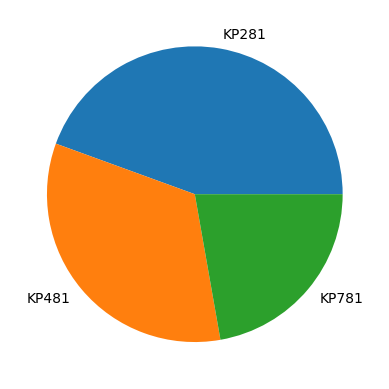

In [ ]:
label = ['KP281','KP481','KP781']
plt.pie(df['Product'].value_counts(), labels = label)
plt.show()

**Q: What age group owns maximum number machines?**
* people with age between 20 to 30 are most likely to buy the fitness machine.

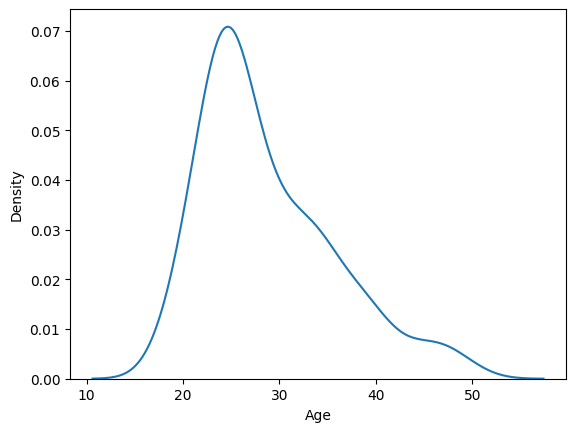

In [ ]:
sns.kdeplot(data=df, x='Age')
plt.show()

**Q: How many females own a machine in comparison to males?**
* By observing the graph, females own about 20% less treadmill than males.

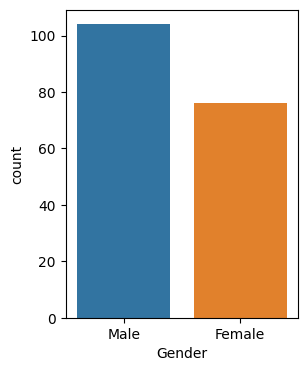

In [ ]:
plt.subplots(figsize=(3,4))
sns.countplot(data=df, x="Gender")
plt.show()

**Q: Do Single people own more treadmill than couples?**
*  As per the data, more treadmill are owned by Couples than singles.

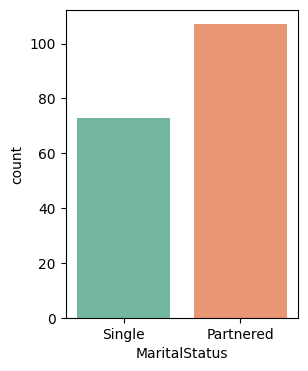

In [ ]:
plt.subplots(figsize=(3,4))
sns.countplot(data=df, x="MaritalStatus", palette='Set2')
plt.show()

**Q: How frequently a consumer operate the treadmill in a week?**
* Significant customers uses the treadmill for 3 days in a week.
* All the owners use the machine atleast 2 days in a week.

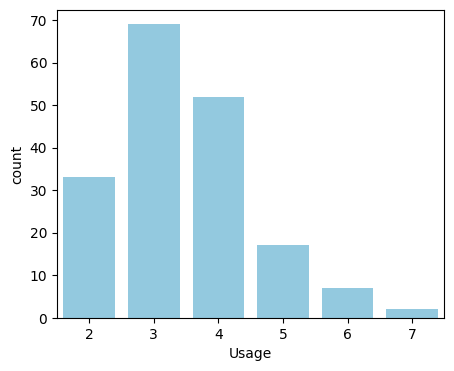

In [ ]:
plt.subplots(figsize=(5,4))
sns.countplot(data=df, x="Usage", color="skyblue")
plt.show()

**Q: What is the likely range of income that own a machine?**
* Consumers income can range from anywhere in between 20k USD to 110K USD annually.
* But it does not mean that people with higher income own maximum treadmills, people in range of 40k to 60k income have highest number of machines.

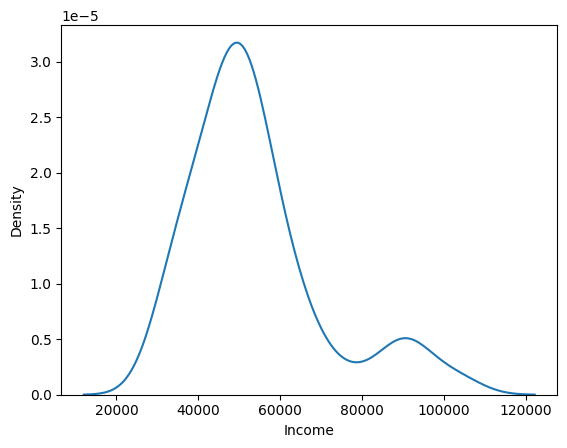

In [ ]:
sns.kdeplot(data=df, x='Income')
plt.show()

**Q: What is the general trend in consumer base while rating themselves in terms of fitness?**

* People most likely will rate themselves 3 out of 5 (i.e. Average in physical health).
* In overall picture, people usually rate self as Average or above Average.
* Lowest count can be obseved is 1 (poor) rating.

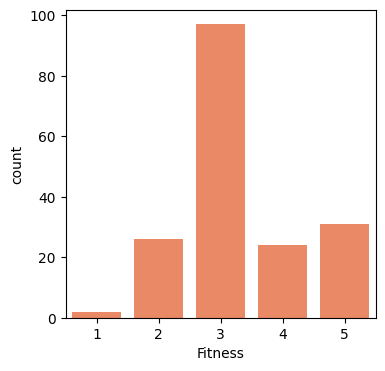

In [ ]:
plt.subplots(figsize=(4,4))
sns.countplot(data=df, x="Fitness", color="coral")
plt.show()

**Q: How much people walk or run on thier machine in week?**

* Data is highly dense between 50 to 100 Miles in a week.

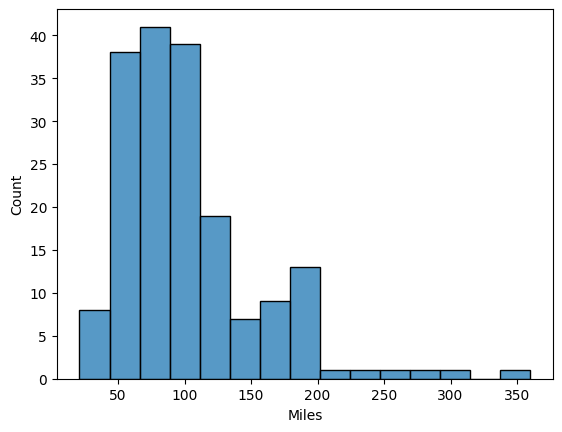

In [ ]:
sns.histplot(data=df, x='Miles',bins=15)
plt.show()

---
#Graphical Analysis 2



**Q:Which Categories shows higher number of outliers than other (Find out using BoxPlot)?**

* All categories have some outliers
* 'Income' and 'Miles' containes most amount of outliers. 'Miles' have outliers that are spreaded more accros a range, people walking more than ~180Miles are considered as outliers.

* 'Age', 'Education' and 'Usage' also have few outliers on the higher end of range.
* Only a single outlier value can be found in 'Fitness'.

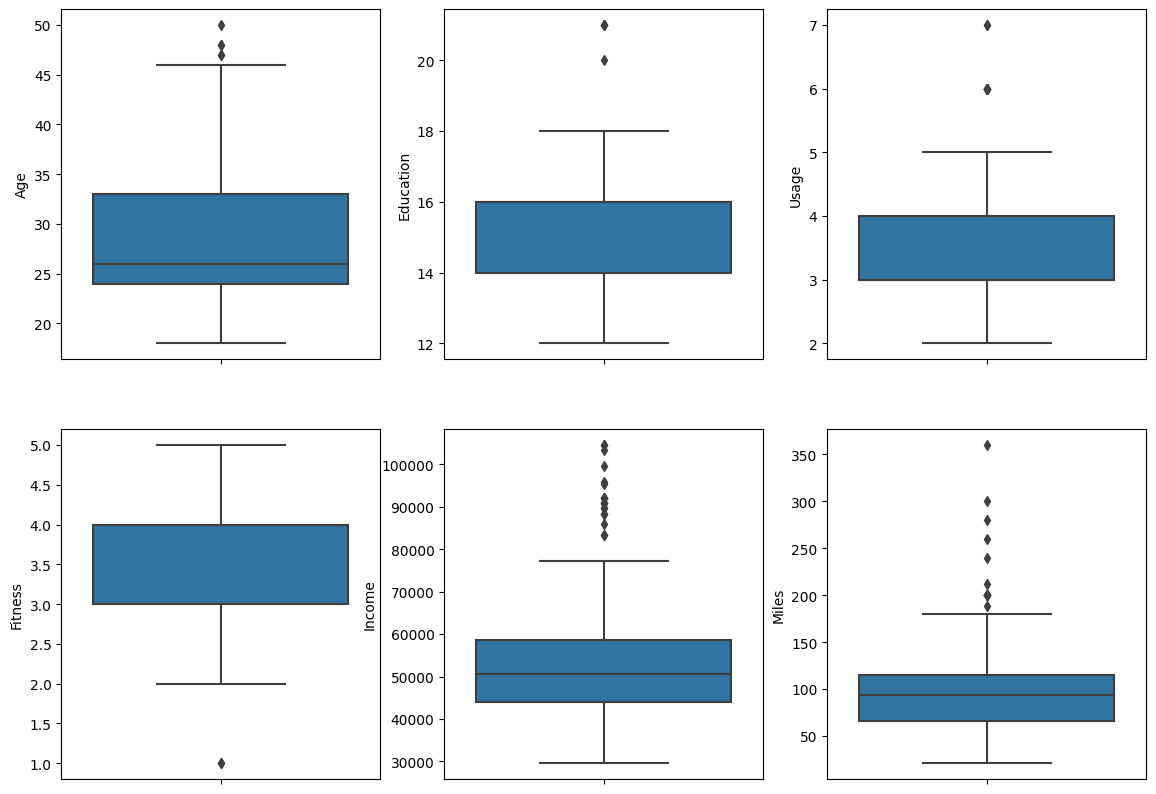

In [ ]:
plt.figure(figsize=(14,10))

plt.subplot(2,3,1)
sns.boxplot(data=df, y="Age")

plt.subplot(2,3,2)
sns.boxplot(data=df, y="Education")

plt.subplot(2,3,3)
sns.boxplot(data=df, y="Usage")

plt.subplot(2,3,4)
sns.boxplot(data=df, y="Fitness")

plt.subplot(2,3,5)
sns.boxplot(data=df, y="Income")

plt.subplot(2,3,6)
sns.boxplot(data=df, y="Miles")

plt.show()

**Q: Do different product leads to different usage by both gender?**

* We can observe a upward trend in the amount of usage as per the model of machine.
* Machine with more advance feature leads to more usage.(i.e. KP781 contains most advance features and is more popular among heavy users)

* For advance model KP781, Females have shown more usage than Males with not outlier values. But in case of males, 2 people have shown exceptional usage between 300 to 360 Miles

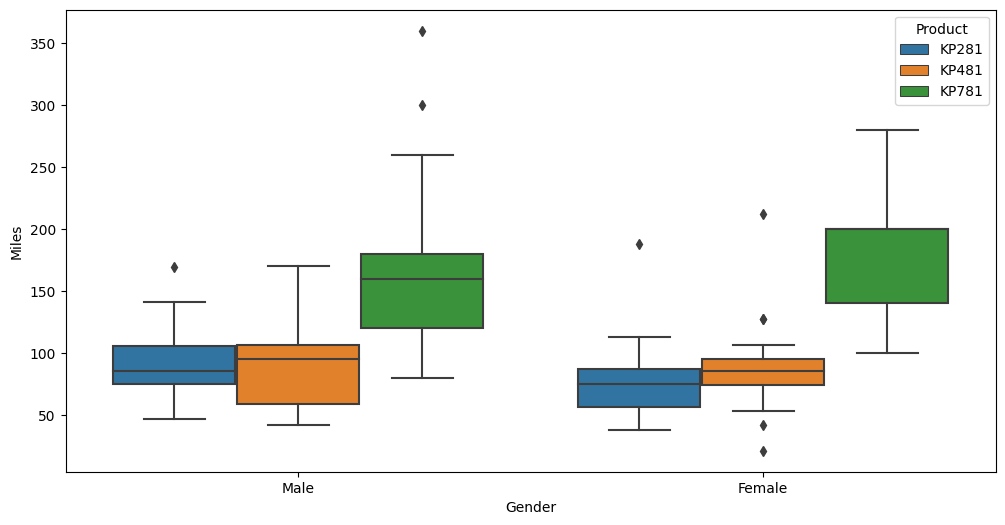

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, y='Miles', x='Gender', hue='Product')
plt.show()

---
#Graphical Analysis 3

*Data correlation*

**Q: Which Category shows most positive correlation among them?**

In [ ]:
df.corr()

<ipython-input-26-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles,Price
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.029263
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.563463
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.623124
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.696616
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.695847
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.643923
Price,0.029263,0.563463,0.623124,0.696616,0.695847,0.643923,1.000000


<ipython-input-27-b3e28bdcac35>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Blues', annot = True)


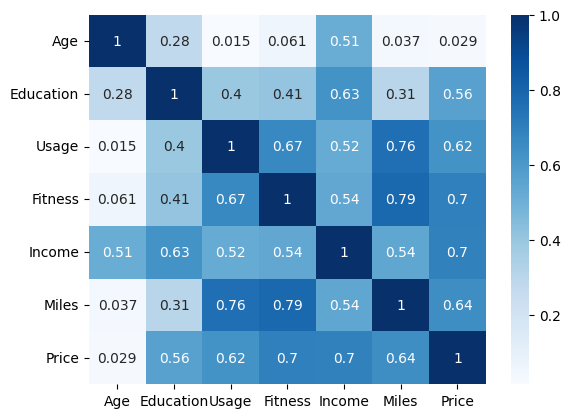

In [ ]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.show()

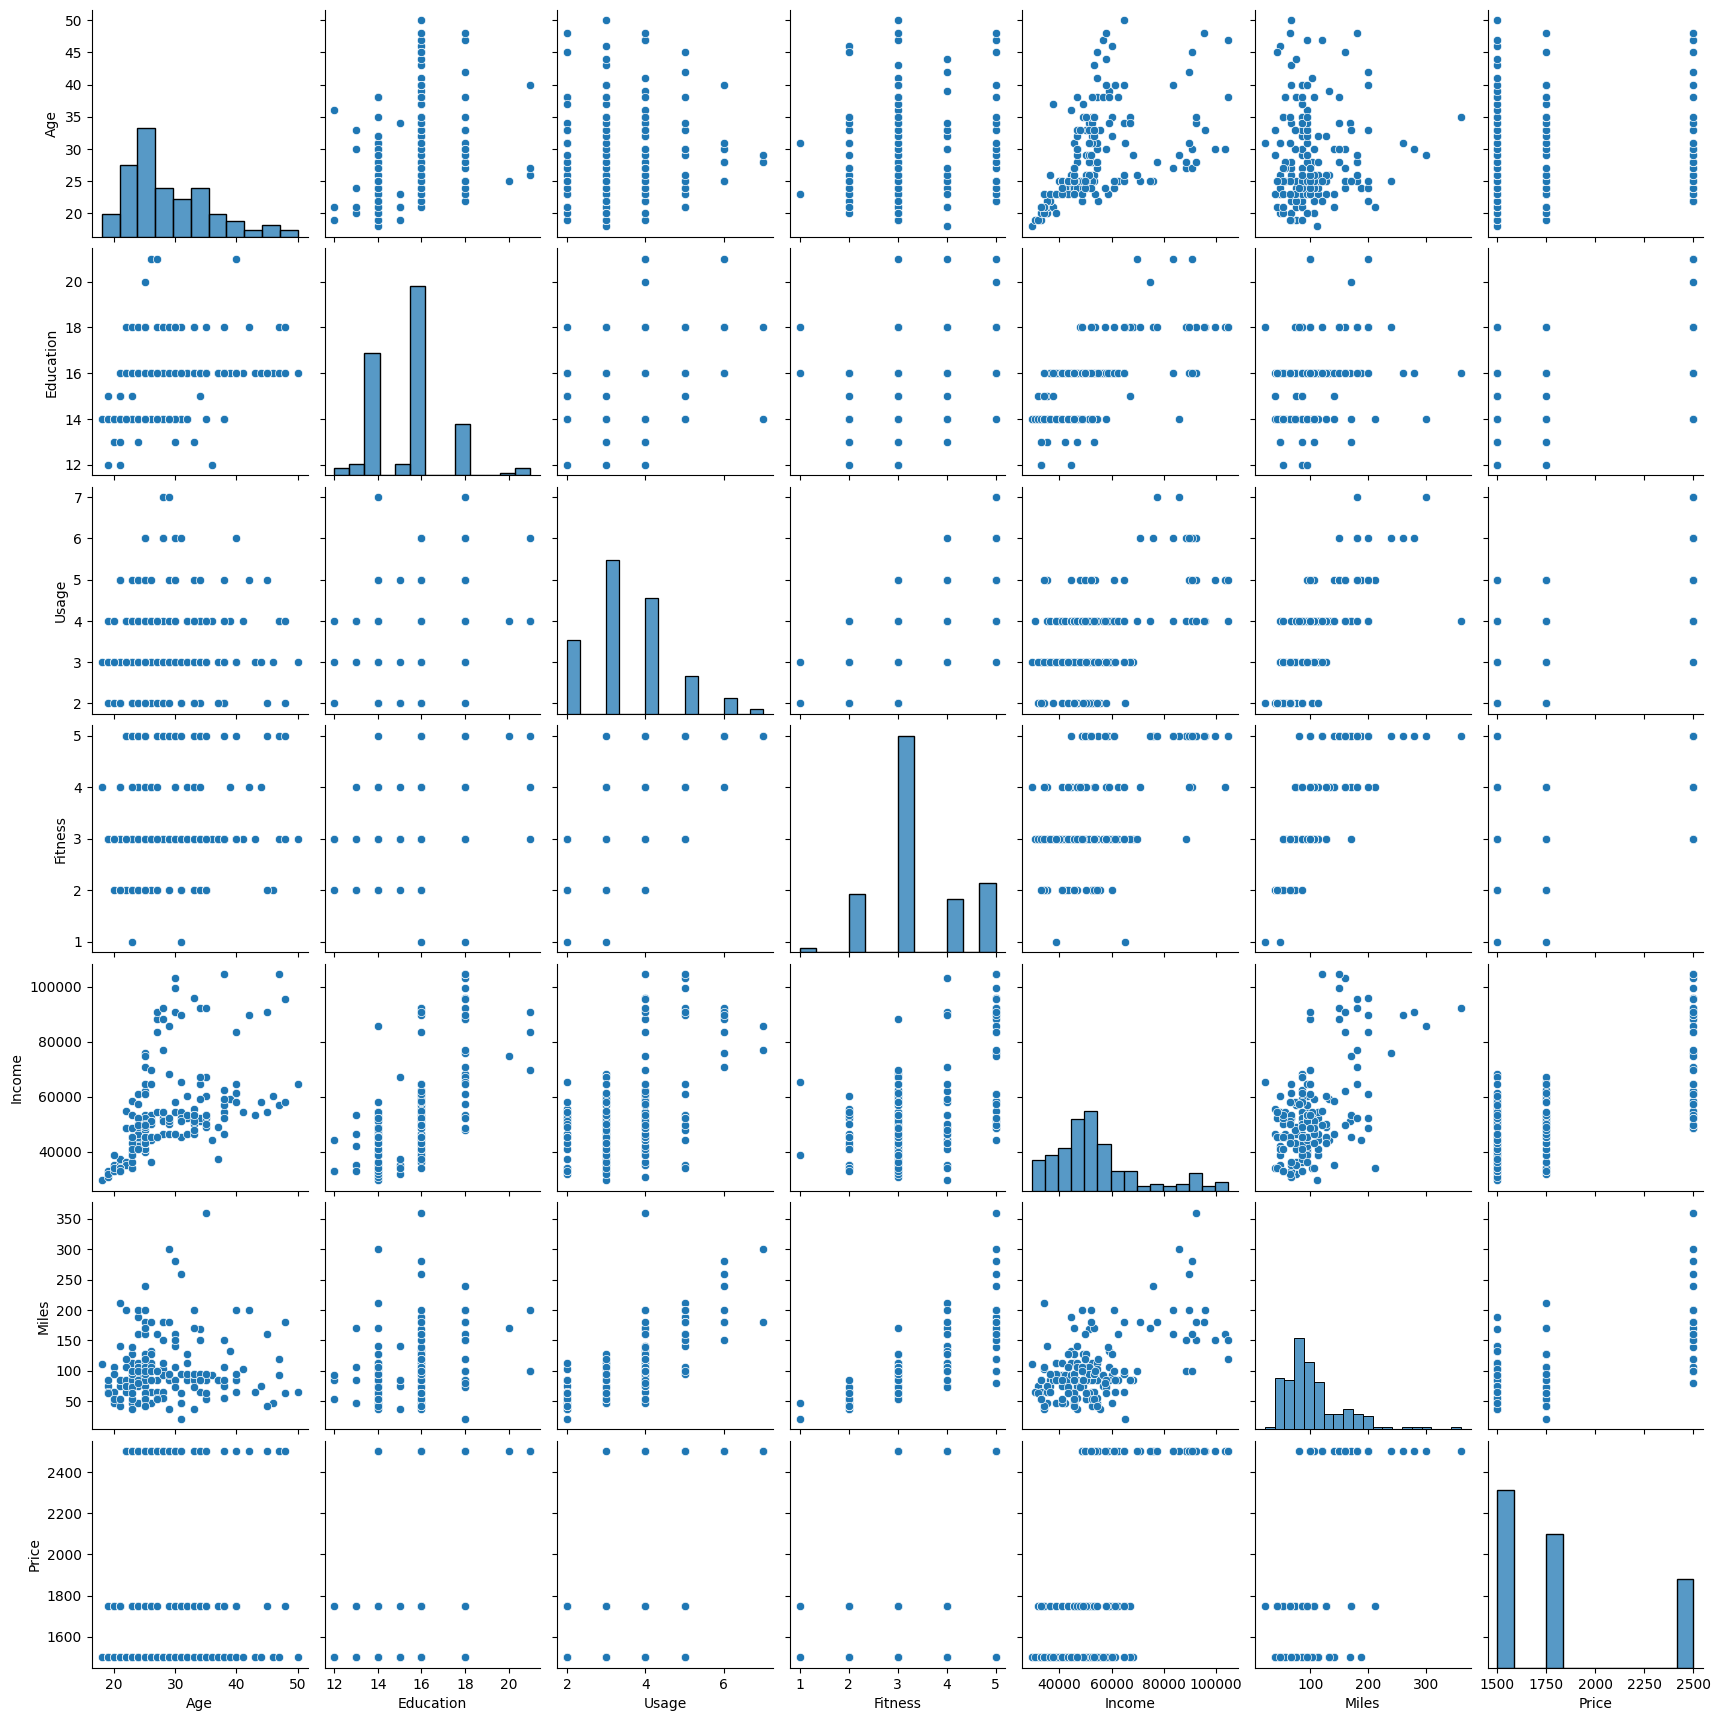

In [ ]:
sns.pairplot(data = df)
plt.show()

Obsereving from correlation table and pairplot:

* Highest +ve correlation is between 'Amount of usage in Miles' and 'Fitness level of user'. Which intuitively also makes sense: higher usage lead to better fitness.

* More +ve correlation is shown in 'Price' & 'Fitness'. Also seen in earlier boxplot, people having advance model have higher usage and higher fitness.

* 'Price' also have high +ve realtion with 'Income'. Means, People with higher income tend to buy more advance model.

* 'Fitness' & 'Usage' is moderately related to 'Education', As education lead to more awareness about fitness as part of lifestyle.

* 'Fitness' & 'Usage' have near zero correlation with 'Age'. Age of the person does not impact the usage of fitness equipment.

* 'Age' is also not a factor for selecting the model of treadmill.

* No data shows a -ve correlation.

In [ ]:
df_Usage_Product = pd.crosstab(df["Usage"], df["Product"])

**Q: How Model of Treadmill is related with Usage?**

* For the basic model 'KP281' maximum usage in between 2 to 4 days in a week. No Owner use this model for more than 5 days.

* For the intermediate model 'KP481' story is same a above, it is rarely used more than 4 days.

* For the advance model 'KP781', people use it for more days, where most popular are 4 to 6 days in a week and some users for all days of a week.


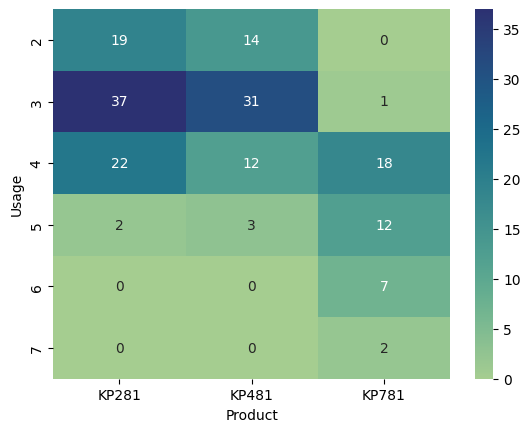

In [ ]:
sns.heatmap(df_Usage_Product, cmap="crest", annot = True)
plt.show()

---
# Probability Analysis

**Q:What is the Probability of male buying a products of aerofit?**
* Chance of Men buying a product is 57.7%. Whereas for female it is 42.2%

In [ ]:
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

**Q:What is the Probability that a new user will use it for 3 days in a week?**
* It is 38.3% chance of using product of 3 days in a week, which is also highest among others.

In [ ]:
df['Usage'].value_counts(normalize=True)

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

**Q: What is the Probability of a specific products of aerofit to sell to a particular gender?**


In [ ]:
df_Gen_Prod = pd.crosstab(df['Gender'],[df['Product']])
df_Gen_Prod

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [ ]:
for g in df['Gender'].unique():
  print('\n')
  for p in df['Product'].unique():
    print('P('+p+'|'+g+'): '
      + str(round(100 * df_Gen_Prod[p].loc[g] / df_Gen_Prod.loc[g].sum(),2)) + "%")



P(KP281|Male): 38.46%
P(KP481|Male): 29.81%
P(KP781|Male): 31.73%


P(KP281|Female): 52.63%
P(KP481|Female): 38.16%
P(KP781|Female): 9.21%


Above results show conditional probabilities for three different models based on the gender. These probabilities suggest how likely each gender will use a particular treadmill model.
 * If a user is female it is more than 50% chance that she wiil be using a KP281 model.
 * KP781 advance model seems to be less popular among females (9.21%) compared to males (31.73%).
 * Other two models are popular in both the genders.

**Q: What are the distributions of number of workout days in a week for a specific gender?**

In [ ]:
df_Gen_use = pd.crosstab(df['Gender'],[df['Usage']])
df_Gen_use

Usage,2,3,4,5,6,7
Gender,,,,,,
Female,20,33,14,7,2,0
Male,13,36,38,10,5,2


In [ ]:
for g in df['Gender'].unique():
  print('\n')
  for p in df['Usage'].sort_values().unique():
    print('P('+str(p)+'-Days|'+str(g)+'): '
      + str(round(100 * df_Gen_use[p].loc[g] / df_Gen_use.loc[g].sum(),2)) + "%")



P(2-Days|Male): 12.5%
P(3-Days|Male): 34.62%
P(4-Days|Male): 36.54%
P(5-Days|Male): 9.62%
P(6-Days|Male): 4.81%
P(7-Days|Male): 1.92%


P(2-Days|Female): 26.32%
P(3-Days|Female): 43.42%
P(4-Days|Female): 18.42%
P(5-Days|Female): 9.21%
P(6-Days|Female): 2.63%
P(7-Days|Female): 0.0%


If we randomly pick a gender and ask the person about number of workout days in a week we get this above distribution.
 * For males, the peak workout day seems to be 4 days a week
 * For Females, the peak workout day seems to be 3 days a week
 * Few individuals engage in very intense workout routines of 6 or 7 days per week.
 * Thier is 0% probability for females working out 7 days a week. (It's also possible due to limited sample size)

**Q: What are the probabilities of users who rated themselves in terms of fitness to own a particular model?**

In [ ]:
df2 = pd.crosstab(df["Fitness"], df["Product"])
df2

Product,KP281,KP481,KP781
Fitness,,,
1,1,1,0
2,14,12,0
3,54,39,4
4,9,8,7
5,2,0,29


In [ ]:
for g in df['Fitness'].sort_values().unique():
  print('\n')
  for p in df['Product'].unique():
    print('P('+str(p)+'|'+str(g)+'-Star): '+ str(round(100 * df2[p].loc[g] / df2.loc[g].sum(),2)) + "%")



P(KP281|1-Star): 50.0%
P(KP481|1-Star): 50.0%
P(KP781|1-Star): 0.0%


P(KP281|2-Star): 53.85%
P(KP481|2-Star): 46.15%
P(KP781|2-Star): 0.0%


P(KP281|3-Star): 55.67%
P(KP481|3-Star): 40.21%
P(KP781|3-Star): 4.12%


P(KP281|4-Star): 37.5%
P(KP481|4-Star): 33.33%
P(KP781|4-Star): 29.17%


P(KP281|5-Star): 6.45%
P(KP481|5-Star): 0.0%
P(KP781|5-Star): 93.55%


* Users giving themselves a 1-Star fitness level are least likely to own a machine (as count is only one for basic & intermediate machines)
* Users with a 2-Star or 3-Star fitness level are more likely to choose KP281 over KP481. With no or small percent in this fitness level group chooses KP781
* Users with a 4-Star fitness level are roughly equally distributed among the three models
* Users with the highest 5-Star fitness level have high preference to choose KP781 model

---
# Insights & Recommendations

*NOTE: Insights are provided in detail near each individual plot/question.*



**Recommendations:**
* Aerofit have wide customer demographics having a significant number of both genders, different ages and fitness level. Hence they can market their product to any adult.
* Business can create an enquiry form when a new potential customer arrives at their store or website that ask for basic information about their fitness level, age, gender, and marital status etc., As seen above, People rate themselves higher in fitness rating they are more inclined to invest in higher-end models.
* Knowing our customers prior will help us to get a better idea of which model we need to target. Example: If a female customer arrives then, buying the KP781 advance model has less probability seems to be less popular among them
* As education is highly correlated with fitness levels. Business can gain customers by organizing webinars or workshops featuring experts in fitness and wellness. These events can attract educated individuals interested in learning more about how to maintain a healthy lifestyle.
* KP281 beginner treadmill is best selling product that is preferred by both genders, promoting its features that appeal to a wide range of users might be beneficial.
* If a company wants to capture the market on based on gender, they could emphasize features of the KP281 model that seem to resonate more with females, and similarly, adapt the marketing of the KP781 model to appeal to males.